In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/drive/MyDrive/surah_info')

In [7]:
df

,Surah Number,Surah Name,Total Ayahs
0,1,Al-Fatihah,7
1,2,Al-Baqarah,286
2,3,Aal-E-Imran,200
3,4,An-Nisa,176
4,5,Al-Maidah,120
...,...,...,...
109,110,An-Nasr,3
110,111,Al-Masad,5
111,112,Al-Ikhlas,4
112,113,Al-Falaq,5


In [8]:

surah_52 = df[df["Surah Number"] == 52]

In [9]:
surah_52

,Surah Number,Surah Name,Total Ayahs
51,52,At-Tur,49


In [10]:
# Sum of total ayahs
total_ayahs_sum = sum(df['Total Ayahs'])
total_ayahs_sum

6236

In [11]:

import matplotlib.pyplot as plt

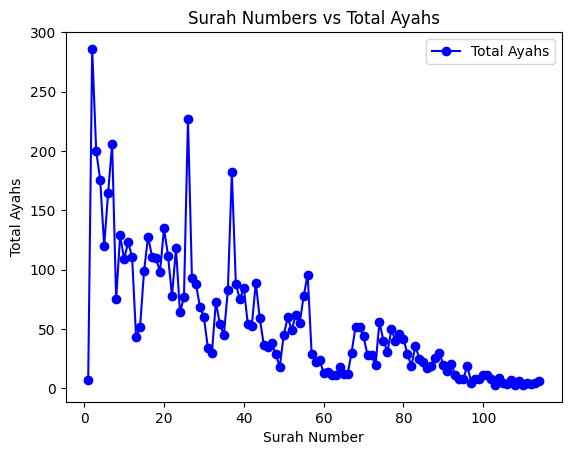

In [12]:
surah_number = df['Surah Number']
total_ayahs = df['Total Ayahs']

plt.plot(surah_number, total_ayahs, marker='o', color='b', label='Total Ayahs')

# Adding titles and labels
plt.title('Surah Numbers vs Total Ayahs')
plt.xlabel('Surah Number')
plt.ylabel('Total Ayahs')

# Display the plot
plt.legend()
plt.show()

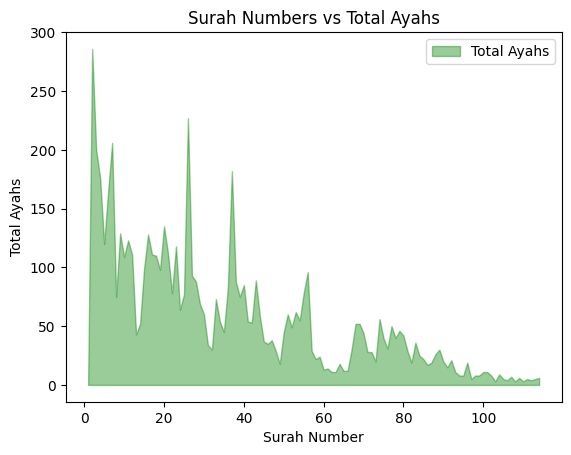

In [13]:
# Plotting the area plot using fill_between
plt.fill_between(df['Surah Number'], df['Total Ayahs'], color='green', alpha=0.4, label='Total Ayahs')

# Adding titles and labels
plt.title('Surah Numbers vs Total Ayahs')
plt.xlabel('Surah Number')
plt.ylabel('Total Ayahs')

# Display the plot
plt.legend()
plt.show()

In [14]:
import seaborn as sns

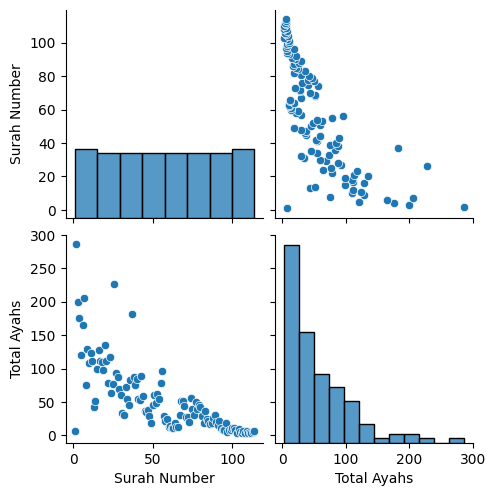

In [15]:
sns.pairplot(df)

# Display the plot
plt.show()

In [16]:
from sklearn.cluster import KMeans

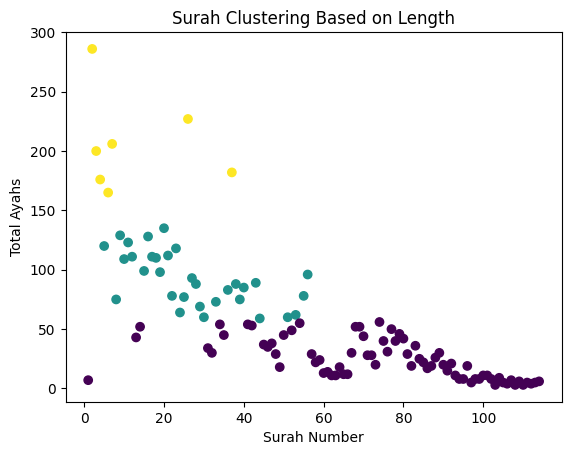

     Surah Number   Surah Name  Total Ayahs  Cluster
0               1   Al-Fatihah            7        0
1               2   Al-Baqarah          286        2
2               3  Aal-E-Imran          200        2
3               4      An-Nisa          176        2
4               5    Al-Maidah          120        1
..            ...          ...          ...      ...
109           110      An-Nasr            3        0
110           111     Al-Masad            5        0
111           112    Al-Ikhlas            4        0
112           113     Al-Falaq            5        0
113           114       An-Nas            6        0

[114 rows x 4 columns]


In [17]:
# categories such as "short", "medium", and "long" based on their Ayah count.
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Total Ayahs']])

# Visualize clusters
plt.scatter(df['Surah Number'], df['Total Ayahs'], c=df['Cluster'])
plt.xlabel('Surah Number')
plt.ylabel('Total Ayahs')
plt.title('Surah Clustering Based on Length')
plt.show()

# Display clustered dataframe
print(df)

In [18]:
# Calculate cumulative sum of Total Ayahs
df['Cumulative Ayahs'] = df['Total Ayahs'].cumsum()

# Display cumulative sum of Ayahs
print(df[['Surah Name', 'Total Ayahs', 'Cumulative Ayahs']])

      Surah Name  Total Ayahs  Cumulative Ayahs
0     Al-Fatihah            7                 7
1     Al-Baqarah          286               293
2    Aal-E-Imran          200               493
3        An-Nisa          176               669
4      Al-Maidah          120               789
..           ...          ...               ...
109      An-Nasr            3              6216
110     Al-Masad            5              6221
111    Al-Ikhlas            4              6225
112     Al-Falaq            5              6230
113       An-Nas            6              6236

[114 rows x 3 columns]


In [19]:
# Find Surahs with matching lengths in reverse order
reverse_ayahs = df['Total Ayahs'].iloc[::-1].reset_index(drop=True)
df['Symmetric Match'] = df['Total Ayahs'] == reverse_ayahs

# Display matched Surahs
print(df[['Surah Name', 'Total Ayahs', 'Symmetric Match']])

      Surah Name  Total Ayahs  Symmetric Match
0     Al-Fatihah            7            False
1     Al-Baqarah          286            False
2    Aal-E-Imran          200            False
3        An-Nisa          176            False
4      Al-Maidah          120            False
..           ...          ...              ...
109      An-Nasr            3            False
110     Al-Masad            5            False
111    Al-Ikhlas            4            False
112     Al-Falaq            5            False
113       An-Nas            6            False

[114 rows x 3 columns]


In [20]:
matched_surahs = df[df['Symmetric Match'] == True]

# If there are any matched Surahs, display them, otherwise print "No value found"
if not matched_surahs.empty:
    print(matched_surahs[['Surah Name', 'Total Ayahs', 'Symmetric Match']])
else:
    print("No value found")

No value found


In [21]:
df

,Surah Number,Surah Name,Total Ayahs,Cluster,Cumulative Ayahs,Symmetric Match
0,1,Al-Fatihah,7,0,7,False
1,2,Al-Baqarah,286,2,293,False
2,3,Aal-E-Imran,200,2,493,False
3,4,An-Nisa,176,2,669,False
4,5,Al-Maidah,120,1,789,False
...,...,...,...,...,...,...
109,110,An-Nasr,3,0,6216,False
110,111,Al-Masad,5,0,6221,False
111,112,Al-Ikhlas,4,0,6225,False
112,113,Al-Falaq,5,0,6230,False


<ipython-input-28-a96479e417f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Surah Number", y="Total Ayahs", data=df, size=5, palette="viridis")


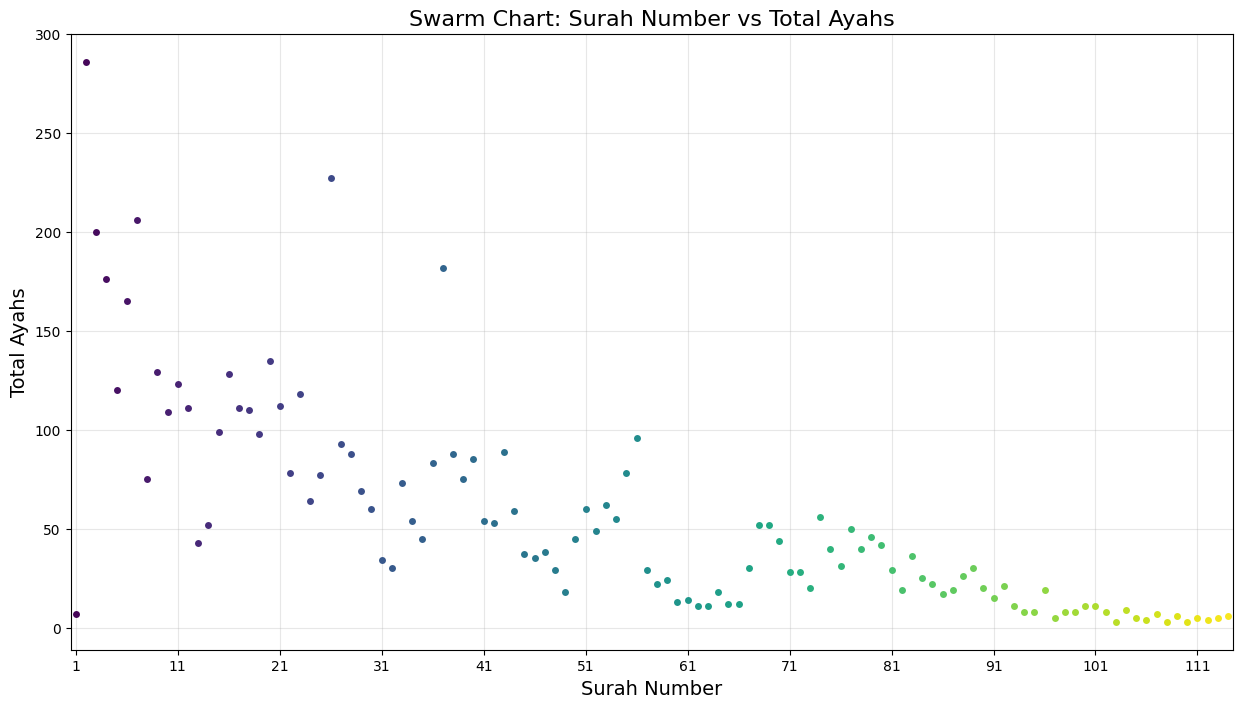

In [28]:
# Create the swarm plot
plt.figure(figsize=(15, 8))
sns.swarmplot(x="Surah Number", y="Total Ayahs", data=df, size=5, palette="viridis")

# Customize the plot
plt.title("Swarm Chart: Surah Number vs Total Ayahs", fontsize=16)
plt.xlabel("Surah Number", fontsize=14)
plt.ylabel("Total Ayahs", fontsize=14)
plt.xticks(ticks=range(0, 115, 10))
plt.grid(alpha=0.3)

# Show the plot
plt.show()